In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch
from tqdm import tqdm
import os
import random
import collections
from data_augmentation import build_balanced_augmented_tensor_dataset  # calcoliamo l'exlained variance sui dati augmentati

In [13]:
# CONFIGURAZIONE
base_dir = os.getcwd()
dataset_path = os.path.join(base_dir, 'data_images', 'train')  # analisi su training set
batch_size = 32
image_size = 224

In [14]:
# riproducibilità
random.seed(42)
torch.manual_seed(42)

In [15]:
# carica dati bilanciati e augmentati
imgs, labels, classes = build_balanced_augmented_tensor_dataset(
    image_folder_path=dataset_path,
    image_size=image_size,
    grayscale=False,
    normalize_mode="zscore"  # fondamentale per PCA
)

In [16]:
# flatten delle immagini [N, C, H, W] → [N, C*H*W]
data = imgs.view(imgs.size(0), -1).numpy()

In [17]:
# PCA
pca = PCA()
pca.fit(data)

PCA()

In [18]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

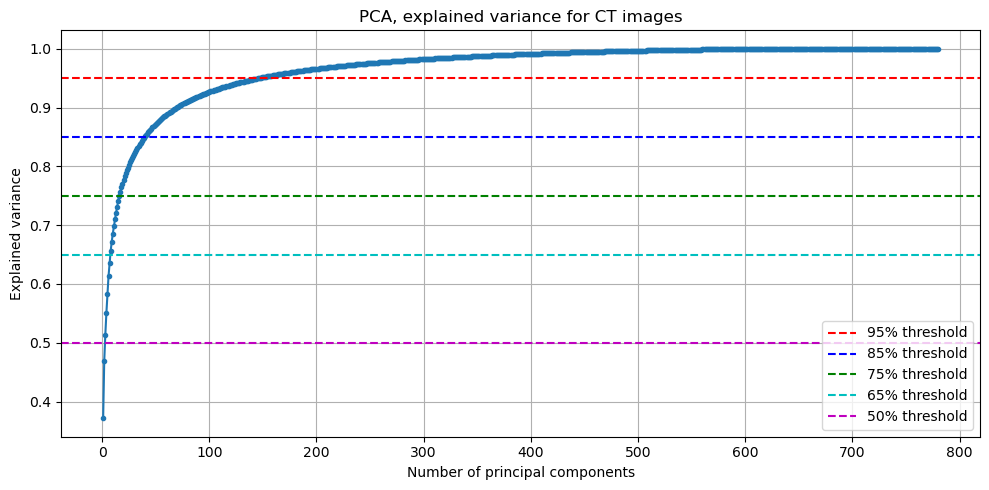

In [19]:
# grafico
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='.')
for y, c in zip([0.95, 0.85, 0.75, 0.65, 0.50], ['r', 'b', 'g', 'c', 'm']):
    plt.axhline(y=y, color=c, linestyle='--', label=f'{int(y*100)}% threshold')
plt.xlabel('Number of principal components')
plt.ylabel('Explained variance')
plt.title('PCA, explained variance for CT images')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
# stampa soglie
soglie = [0.95, 0.85, 0.75, 0.65, 0.50]
for soglia in soglie:
    num_components = np.argmax(cumulative_variance >= soglia) + 1
    print(f"Number of components that explains {int(soglia*100)}% of variance: {num_components}")

Number of components that explains 95% of variance: 146
Number of components that explains 85% of variance: 40
Number of components that explains 75% of variance: 17
Number of components that explains 65% of variance: 8
Number of components that explains 50% of variance: 3


In [21]:
print(f"Numero immagini (n_samples): {data.shape[0]}")
print(f"Numero feature per immagine (n_features): {data.shape[1]}")


Numero immagini (n_samples): 780
Numero feature per immagine (n_features): 150528


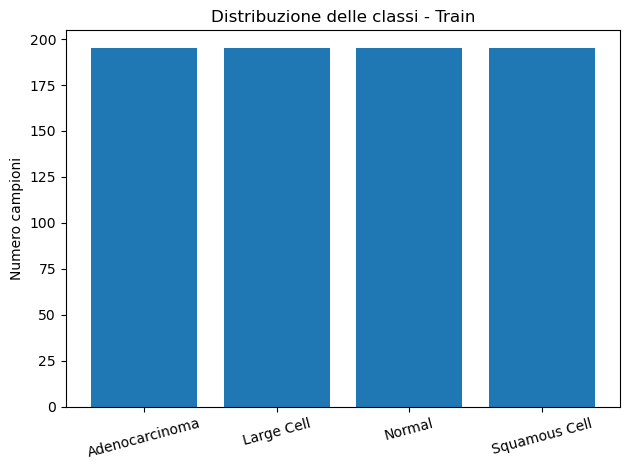

In [22]:
label_counts = collections.Counter(labels.tolist())
pretty_labels = ['Adenocarcinoma', 'Large Cell', 'Normal', 'Squamous Cell']
plt.bar(pretty_labels, [label_counts.get(i, 0) for i in range(len(pretty_labels))])
plt.title("Distribuzione delle classi - Train")
plt.xticks(rotation=15)
plt.ylabel("Numero campioni")
plt.tight_layout()
plt.show()
